### Importar Imagenes

In [256]:
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import segmentation, color
from skimage.filters import gaussian,sobel
from skimage.future import graph
from scipy import ndimage, misc
from sklearn.feature_extraction import image
imagen=io.imread(fname="ducks01_0100.jpg")

### Funciones para mostrar imagenes

In [5]:
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[4,4])
    ax.imshow(imagen)
    plt.show()    
def mostrar_imagen_bn(imagen):
    fig,ax=plt.subplots(figsize=[4,4])
    ax.imshow(imagen,cmap='gray')
    plt.show()

### Seleccion Imagen a procesar

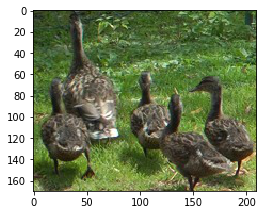

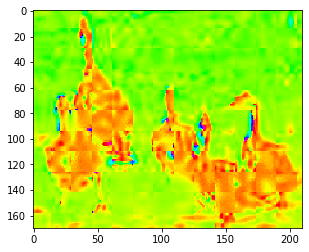

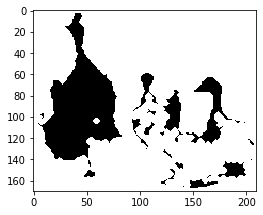

In [427]:
from skimage.segmentation import flood, flood_fill
import skimage.feature as feature
minx=370
maxx=580
miny=210
maxy=380
imagen_segmento_color=imagen[miny:maxy,minx:maxx]
mostrar_imagen(imagen_segmento_color)
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
plt.imshow(hue_img, cmap='hsv')
med_den = ndimage.median_filter(hue_img, 3)
duc_sobel = sobel(med_den)
duck_det = flood_fill(duc_sobel, (135, 150),255, tolerance=0.0155)
duck_det = ndimage.median_filter(duck_det,3)
thresh_min = skfilt.threshold_otsu(duck_det)
binary_du_min = ~(duck_det > thresh_min)
binary_du_min = morphology.remove_small_objects(binary_du_min,600)
binary_du_min=morphology.erosion(image=binary_du_min,selem=disk(2))
binary_du_min=~binary_du_min
mostrar_imagen_bn(binary_du_min)

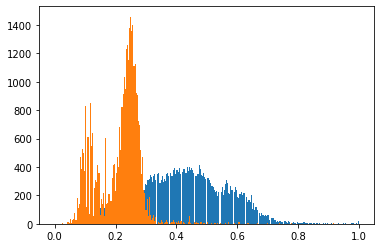

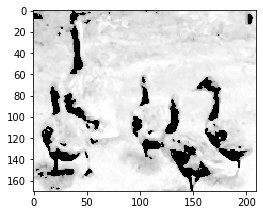

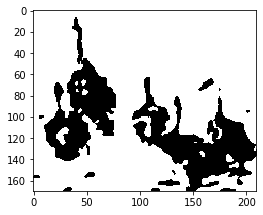

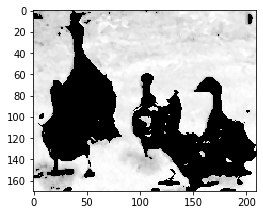

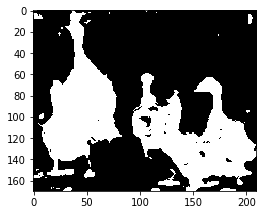

In [435]:
from skimage.color import rgb2hsv
import skimage.filters as skfilt
from skimage.exposure import rescale_intensity
from skimage import exposure
rgb_img = imagen_segmento_color
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
med_denoised = ndimage.median_filter(value_img, 3)
img_tmp=rescale_intensity(med_denoised, in_range=(0.23, .7), out_range=(0, 1))
gamma_corrected = exposure.adjust_gamma(img_tmp, 0.1)
med_denoised_hue = ndimage.median_filter(hue_img, 4)
img_tmp_hue=rescale_intensity(med_denoised_hue, in_range=(0.01, .3), out_range=(0, 1))
gamma_corrected_hue = exposure.adjust_gamma(img_tmp_hue, 0.08)
thresh_val = skfilt.threshold_otsu(gamma_corrected_hue)
new_mask = gamma_corrected_hue > thresh_val
plt.hist(med_denoised.ravel(),bins=255)
plt.hist(med_denoised_hue.ravel(),bins=255)
mostrar_imagen_bn(gamma_corrected)
mostrar_imagen_bn(new_mask)
img_esperada=gamma_corrected*new_mask*binary_du_min
mostrar_imagen_bn(img_esperada)

thresh_min = skfilt.threshold_otsu(img_esperada)
binary_min = ~(img_esperada > thresh_min)

mostrar_imagen_bn(binary_min)



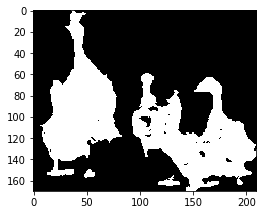

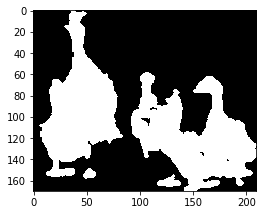

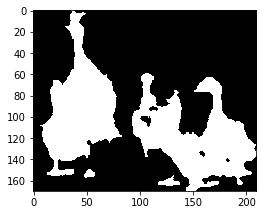

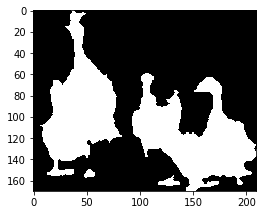

In [436]:
from skimage import morphology
from skimage.morphology import square,disk
from scipy import ndimage as ndi
im0=morphology.remove_small_objects(binary_min,40)
mostrar_imagen_bn(im0)
im1=morphology.dilation(image=im0,selem=disk(1))
mostrar_imagen_bn(im1)
im2=morphology.erosion(image=im1,selem=disk(1))
mostrar_imagen_bn(im2)
im3 = ndi.binary_fill_holes(im2)
mostrar_imagen_bn(im3)
im4 = morphology.dilation(image=im3,selem=disk(1))


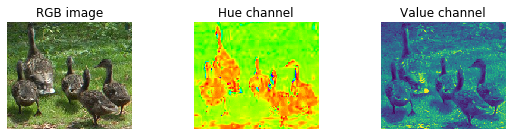

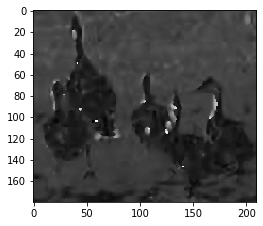

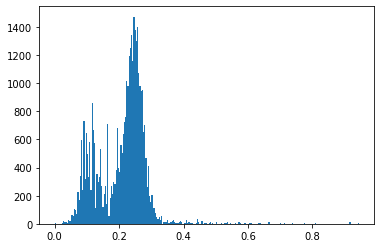

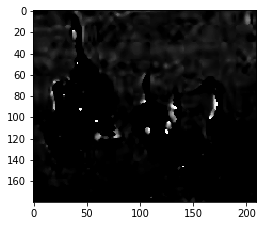

In [187]:
from skimage.color import rgb2hsv
import skimage.filters as skfilt
from skimage.exposure import rescale_intensity
rgb_img = imagen_segmento_color
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
med_denoised = ndimage.median_filter(hue_img, 3)
med_denoised
mostrar_imagen_bn(med_denoised)
plt.hist(med_denoised.ravel(),bins=255)
img_tmp=rescale_intensity(med_denoised, in_range=(0.23, .7), out_range=(0, 1))
mostrar_imagen_bn(img_tmp)

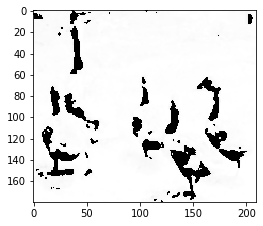

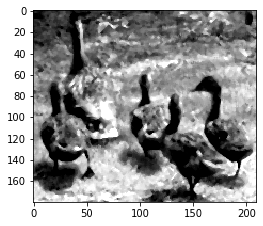

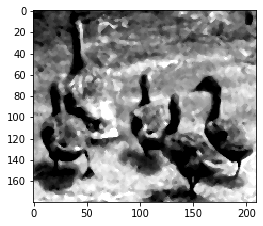

In [126]:
from skimage import exposure
gamma_corrected = exposure.adjust_gamma(img_tmp, 0.01)
# Logarithmic
logarithmic_corrected = exposure.adjust_log(img_tmp, 4)

mostrar_imagen_bn(gamma_corrected)
mostrar_imagen_bn(logarithmic_corrected)

med_denoised_gama = ndimage.median_filter(logarithmic_corrected, 3)
mostrar_imagen_bn(med_denoised_gama)

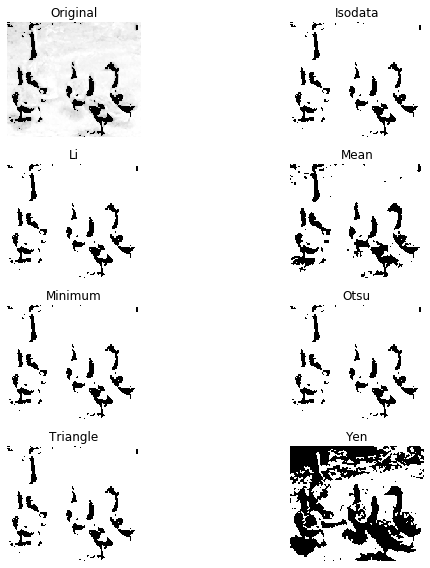

In [123]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(gamma_corrected, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
from skimage import morphology
from skimage.morphology import square,disk
im0=morphology.remove_small_objects(imagen_binaria,40)
mostrar_imagen(im0)
im1=morphology.erosion(image=im0,selem=disk(2))
mostrar_imagen(im1)
im2=morphology.dilation(image=im1,selem=disk(4))
mostrar_imagen(im2)

In [ ]:
from skimage.filters import try_all_threshold
img = data.page()
fig, ax = try_all_threshold(gamma_corrected, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
import skimage.filters as skfilt
from skimage.measure import label
from skimage.measure import regionprops
thresh_val = skfilt.threshold_otsu(imagen_filtro_gaus)
display(thresh_val)
new_mask = imagen_filtro_gaus > thresh_val
object_labels = label(new_mask)
display(object_labels)
some_props = regionprops(object_labels)
areas = [p.area for p in some_props]
areas_total= [ (object_labels == l).sum() 
         for l in range(1, object_labels.max()+1) ] 
mostrar_imagen_bn(new_mask)

In [ ]:
med_denoised
plt.imshow(med_denoised, cmap='gray')

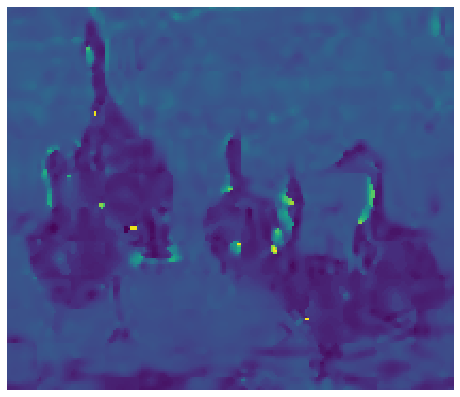

In [188]:
#I = med_denoised
#I = hue_img


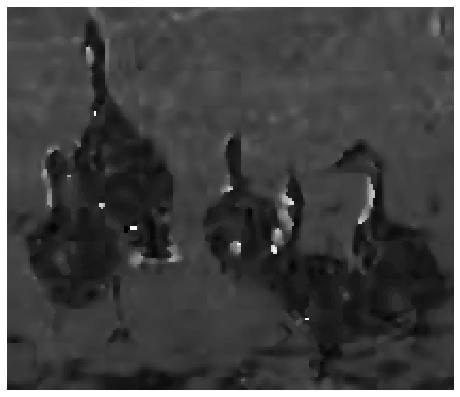

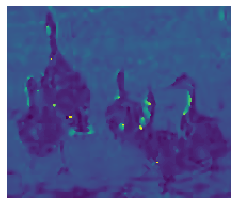

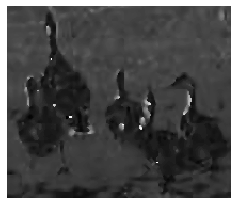

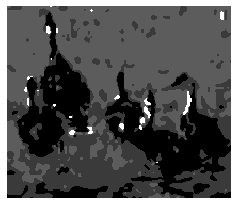

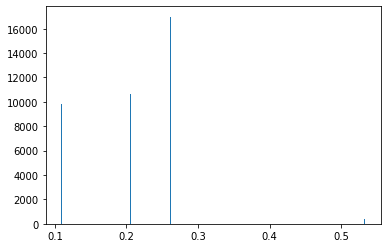

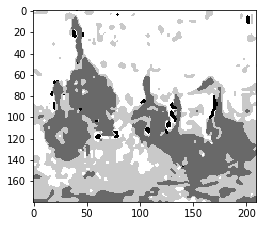

In [212]:
from sklearn.cluster import KMeans
import numpy as np
I=med_denoised
#I=img_esperada
plt.figure(figsize=(4,4))
plt.imshow(I)
plt.axis('off')
plt.show()
I1 = I
I2 = np.asarray(I1,dtype=np.float)
plt.figure(figsize=(4,4))
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.show()
X = I2.reshape((-1, 1))
k_means = KMeans(n_clusters=4)
k_means.fit(X)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
I2_compressed = np.choose(etiquetas, centroides)
I2_compressed.shape = I2.shape
plt.figure(figsize=(4,4))
plt.imshow(I2_compressed,cmap='gray')
plt.axis('off')
plt.show()
plt.hist(I2_compressed.ravel(),bins=255)
I2_compressed[(I2_compressed>0.4)&(I2_compressed<1)]=0
mostrar_imagen_bn(I2_compressed)

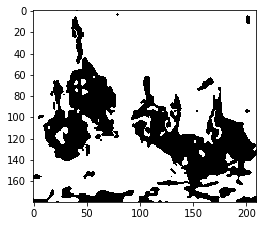

In [213]:
thresh_min = skfilt.threshold_otsu(I2_compressed)
binary_m_ot = I2_compressed > thresh_min
mostrar_imagen_bn(binary_m_ot)

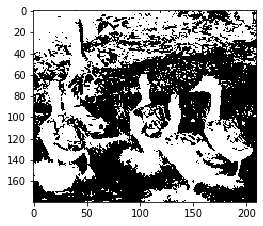

In [34]:
import skimage.filters as skfilt
thresh =  skfilt.threshold_otsu(I2_compressed)
binary = I2_compressed > thresh
binary_neg = ~binary
mostrar_imagen_bn(binary_neg)